<a href="https://colab.research.google.com/github/saracherif123/Research-Publications-Knowledge-Graph/blob/main/Proposal_TBOX_ABOX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install rdflib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 8.1 MB/s eta 0:00:00



*Authors write research papers that can be published in the proceedings of a conference or workshop, or in a journal.*

### TBOX
$$∃Writes.\top \sqsubseteq Author$$
$$∃Writes^{-}.\top \sqsubseteq Paper$$
$$∃Publishes.\top \sqsubseteq (Workshop \sqcup Conference \sqcup Magazine)$$
$$∃Publishes^{-}.\top \sqsubseteq (Journal \sqcup Proceeding)$$
$$∃Includes^{-}.\top \sqsubseteq Paper$$
$$∃Includes.\top \sqsubseteq (Journal \sqcup Proceeding)$$

### ABOX
$$Writes(x, y)$$
$$Publishes(x, y)$$
$$Includes(x, y)$$

*A conference/workshop is organized in terms of editions. Each edition of a conference/workshop is held in a given city (venue) at a specific period of time of a given year.*


### TBOX
$$ Edition \sqsubseteq (Workshop \sqcup Conference)$$
$$∃HasEdition.Edition \sqsubseteq (Workshop \sqcup Conference)$$
$$∃HasEdition.\top \sqsubseteq (Workshop \sqcup Conference)$$
$$∃HasEdition^{-}.\top \sqsubseteq Edition$$

$$Edition \sqsubseteq ∃HasVenue.Venue$$
$$∃HasVenue.\top \sqsubseteq Edition$$
$$∃HasVenue^{-}.\top \sqsubseteq Venue$$

$$Edition \sqsubseteq ∃HasYear.Year$$
$$∃HasYear.\top \sqsubseteq Edition$$
$$∃HasYear^{-}.\top \sqsubseteq Year$$

### ABOX
$$HasEdition(x, y)$$
$$HasVenue(x, y)$$
$$HasYear(x, y)$$


*Proceedings are published records which include all the papers presented in an edition of a conference/workshop.*

No new TBOX, this statement is already decribed by:

$$∃Publishes^{-} \sqsubseteq (Journal \sqcup Proceeding)$$
$$∃Publishes \sqsubseteq (Workshop \sqcup Conference \sqcup Magazine)$$
$$∃HasEdition \sqsubseteq (Workshop \sqcup Conference)$$
$$∃Includes^{-} \sqsubseteq Paper$$
$$∃Includes \sqsubseteq (Journal \sqcup Proceeding)$$


*Oppositely, journals do not hold joint meeting events and, like a magazine, a journal publishes accepted papers in terms of volumes. There can be various volumes of a journal per year. *

### TBOX
$$\exists HasVolume.\top \sqsubseteq Journal$$
$$\exists HasVolume^{-}.\top \sqsubseteq Volume$$

### ABOX
$$HasVolume(x, y)$$

*A paper can be written by many authors, however only one of them acts as corresponding author.*

### TBOX
$$∃IsCorresponding.\top \sqsubseteq Author$$
$$∃IsCorresponding^{-}.\top \sqsubseteq Paper$$
$$Paper \sqsubseteq \space \leq1 IsCorresponding^{-}.Author $$

### ABOX
$$IsCorresponding(x, y)$$

*A paper can be cited by another paper, meaning their content is related.*

### TBOX
$$∃Cites.\top \sqsubseteq Paper$$
$$∃Cites^{-}.\top \sqsubseteq Paper$$

### ABOX
$$Cites(x, y)$$

*A paper can be about one or more topics, specified by means of keywords (e.g., property graph, graph processing, data quality, etc.).*

### TBOX
$$∃Discuss.\top \sqsubseteq Paper$$
$$∃Discuss^{-}.\top \sqsubseteq Keyword$$

### ABOX
$$Discuss(x, y)$$

*A paper must also contain an abstract (i.e., a summary of its content). *
### TBOX
$$∃Contains.\top \sqsubseteq Paper$$
$$∃Contains^{-}.\top \sqsubseteq Abstract$$
$$Paper \sqsubseteq \space \geq 1 Contains.Abstract$$

### ABOX
$$Contains(x, y)$$

*When a paper is submitted to a conference/workshop or a journal, the conference chair or the journal editor assigns a set of reviewers (typically three) to each paper. Reviewers are scientists and therefore they are relevant authors (i.e., they have published papers in relevant conferences or journals). Obviously, the author of a certain paper cannot be reviewer of her own paper.*

### TBOX
$$RelevantAuthor \sqsubseteq Author$$
$$Reviewer \sqsubseteq RelevantAuthor$$
$$∃Assigns.\top \sqsubseteq (ConferenceChair \sqcup JournalEditor)$$
$$∃Assigns^{-}.\top \sqsubseteq Reviewer$$
$$∃Reviews.\top \sqsubseteq Reviewer$$
$$∃Reviews^{-}.\top \sqsubseteq Paper$$
$$Paper \sqsubseteq \space \geq 3 Reviews^{-}.Reviewer$$
$$∃Reviews^{-}.\top \sqsubseteq Paper$$
$$Reviewer \sqcap Writes.Paper\sqsubseteq \neg ∃Reviews.Paper$$

### ABOX
$$Assigns(x, y)$$
$$Reviews(x, y)$$


In [6]:
from rdflib import Graph, Namespace, RDF, RDFS, OWL, BNode, Literal

# Crear grafo
g = Graph()

# Definir namespace
EX = Namespace("http://example.org/ontology#")
g.bind("ex", EX)
g.bind("rdfs", RDFS)
g.bind("owl", OWL)

# Definir clases
classes = [
    'Author', 'Paper', 'Workshop', 'Conference', 'Magazine', 'Journal', 'Proceeding',
    'Edition', 'Venue', 'Year', 'Volume', 'Keyword', 'Abstract',
    'RelevantAuthor', 'Reviewer', 'ConferenceChair', 'JournalEditor'
]
for c in classes:
    g.add((EX[c], RDF.type, OWL.Class))

# Definir propiedades
props = [
    'writes', 'publishes', 'includes', 'hasEdition', 'hasVenue', 'hasYear',
    'hasVolume', 'isCorresponding', 'cites', 'discuss', 'contains', 'assigns', 'reviews'
]
for p in props:
    g.add((EX[p], RDF.type, OWL.ObjectProperty))

# Propiedades inversas
inverses = {
    'writes': 'isWrittenBy',
    'publishes': 'isPublishedBy',
    'includes': 'isIncludedIn',
    'hasEdition': 'editionOf',
    'hasVenue': 'venueOf',
    'hasYear': 'yearOf',
    'hasVolume': 'volumeOf',
    'isCorresponding': 'hasCorresponding',
    'cites': 'isCitedBy',
    'discuss': 'isDiscussedBy',
    'contains': 'isContainedIn',
    'assigns': 'isAssignedBy',
    'reviews': 'isReviewedBy'
}
for p, inv in inverses.items():
    g.add((EX[inv], RDF.type, OWL.ObjectProperty))
    g.add((EX[p], OWL.inverseOf, EX[inv]))

# Asignar domain y range (existential)
domains_ranges = [
    ('writes', 'Author', 'Paper'),
    ('publishes', None, None),  # range/journal/proceeding via union
    ('includes', None, 'Paper'),
    ('hasEdition', None, 'Edition'),
    ('hasVenue', 'Edition', 'Venue'),
    ('hasYear', 'Edition', 'Year'),
    ('hasVolume', 'Journal', 'Volume'),
    ('isCorresponding', 'Author', 'Paper'),
    ('cites', 'Paper', 'Paper'),
    ('discuss', 'Paper', 'Keyword'),
    ('contains', 'Paper', 'Abstract'),
    ('assigns', None, 'Reviewer'),
    ('reviews', None, 'Paper')
]
for prop, dom, ran in domains_ranges:
    if dom:
        g.add((EX[prop], RDFS.domain, EX[dom]))
    if ran:
        g.add((EX[prop], RDFS.range, EX[ran]))

# Unión Workshop ⊔ Conference para Edition
union_wc = BNode()
g.add((union_wc, RDF.type, OWL.Class))
list_wc = BNode()
g.add((union_wc, OWL.unionOf, list_wc))
# crear lista RDF (Workshop, Conference)
g.add((list_wc, RDF.first, EX.Workshop))
rest = BNode()
g.add((list_wc, RDF.rest, rest))
g.add((rest, RDF.first, EX.Conference))
nil = RDF.nil
g.add((rest, RDF.rest, nil))
# Edition subClassOf union
g.add((EX.Edition, RDFS.subClassOf, union_wc))

# Cardinalidad y restricciones con OWL.Restriction
# Corresponding: <=1   isCorresponding^- Author
res1 = BNode()
g.add((res1, RDF.type, OWL.Restriction))
g.add((res1, OWL.onProperty, EX.hasCorresponding))
g.add((res1, OWL.maxCardinality, Literal(1)))
g.add((res1, OWL.onClass, EX.Author))
g.add((EX.Paper, RDFS.subClassOf, res1))

# Abstract: >=1 contains.Abstract
res2 = BNode()
g.add((res2, RDF.type, OWL.Restriction))
g.add((res2, OWL.onProperty, EX.contains))
g.add((res2, OWL.minCardinality, Literal(1)))
g.add((res2, OWL.onClass, EX.Abstract))
g.add((EX.Paper, RDFS.subClassOf, res2))

# Reviews: >=3 inverse
res3 = BNode()
g.add((res3, RDF.type, OWL.Restriction))
g.add((res3, OWL.onProperty, EX.reviews))
g.add((res3, OWL.minCardinality, Literal(3)))
g.add((res3, OWL.onClass, EX.Reviewer))
g.add((EX.Paper, RDFS.subClassOf, res3))

# Irrevisable por autor mismo: Reviewer ⊓ Writes.Paper ⊑ ¬∃Reviews.Paper
left = BNode()
g.add((left, RDF.type, OWL.Class))
# Intersection
intnode = BNode()
g.add((intnode, RDF.type, OWL.Class))
intlist = BNode()
g.add((intnode, OWL.intersectionOf, intlist))
# lista: Reviewer, ∃writes.Paper
g.add((intlist, RDF.first, EX.Reviewer))
rest2 = BNode()
g.add((intlist, RDF.rest, rest2))
tRes = BNode()
g.add((tRes, RDF.type, OWL.Restriction))
g.add((tRes, OWL.onProperty, EX.writes))
g.add((tRes, OWL.someValuesFrom, EX.Paper))
g.add((rest2, RDF.first, tRes))
g.add((rest2, RDF.rest, RDF.nil))

right = BNode()
g.add((right, RDF.type, OWL.Restriction))
g.add((right, OWL.onProperty, EX.reviews))
g.add((right, OWL.someValuesFrom, OWL.Nothing))

g.add((intnode, RDFS.subClassOf, right))

# Serializar
print(g.serialize(format='turtle'))


@prefix ex: <http://example.org/ontology#> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

ex:ConferenceChair a owl:Class .

ex:JournalEditor a owl:Class .

ex:Magazine a owl:Class .

ex:Proceeding a owl:Class .

ex:RelevantAuthor a owl:Class .

ex:assigns a owl:ObjectProperty ;
    rdfs:range ex:Reviewer ;
    owl:inverseOf ex:isAssignedBy .

ex:cites a owl:ObjectProperty ;
    rdfs:domain ex:Paper ;
    rdfs:range ex:Paper ;
    owl:inverseOf ex:isCitedBy .

ex:discuss a owl:ObjectProperty ;
    rdfs:domain ex:Paper ;
    rdfs:range ex:Keyword ;
    owl:inverseOf ex:isDiscussedBy .

ex:hasEdition a owl:ObjectProperty ;
    rdfs:range ex:Edition ;
    owl:inverseOf ex:editionOf .

ex:hasVenue a owl:ObjectProperty ;
    rdfs:domain ex:Edition ;
    rdfs:range ex:Venue ;
    owl:inverseOf ex:venueOf .

ex:hasVolume a o

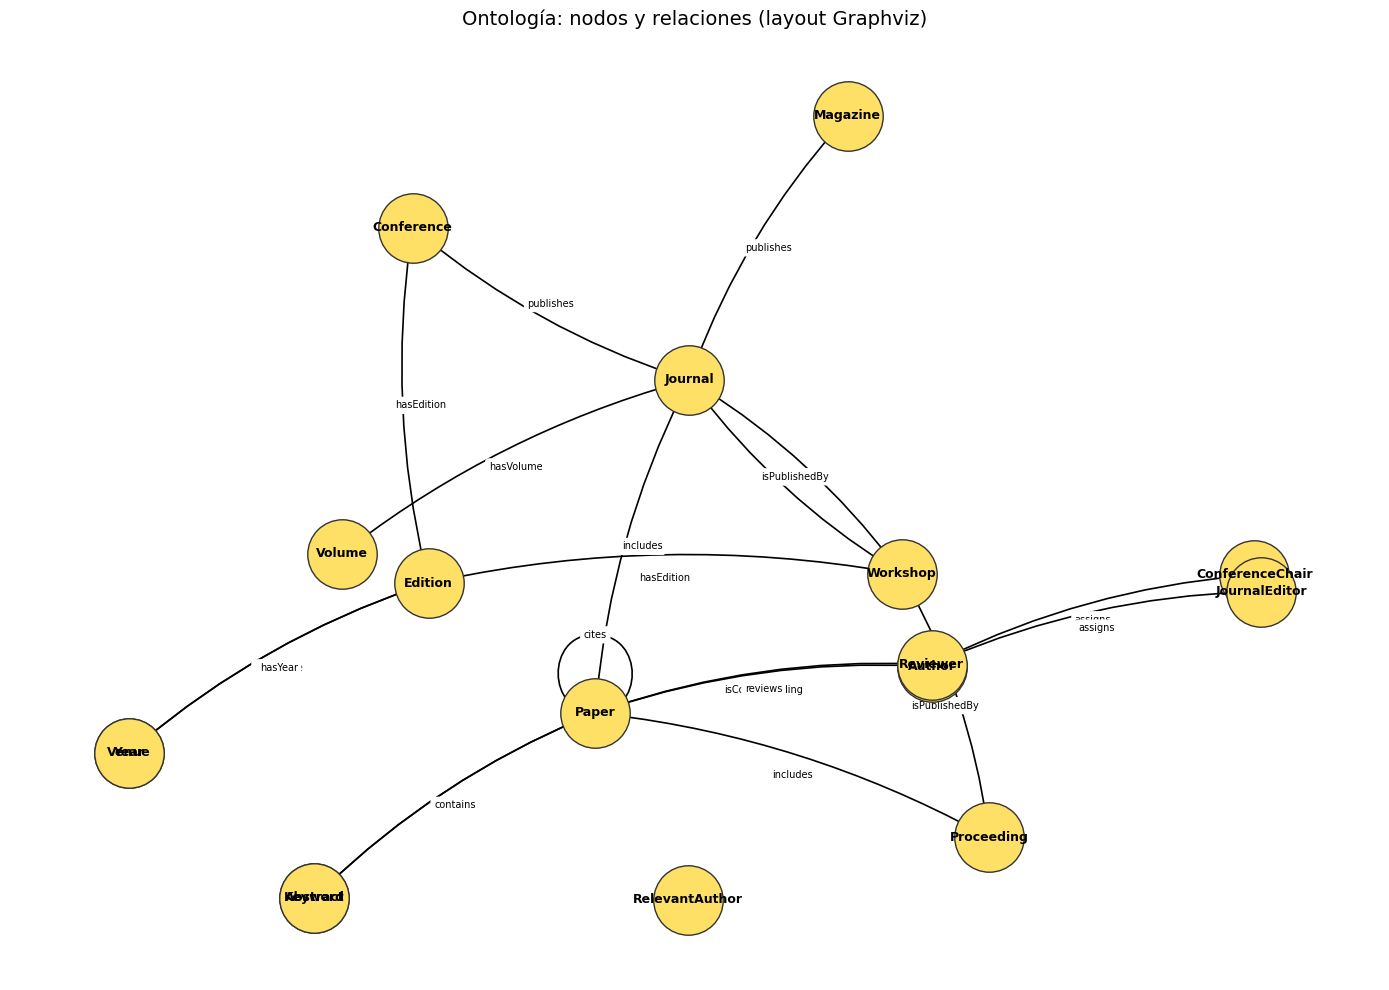

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear grafo dirigido
G = nx.DiGraph()

# Definir clases y propiedades según la ontología
classes = [
    "Author", "Paper", "Workshop", "Conference", "Magazine", "Journal", "Proceeding",
    "Edition", "Venue", "Year", "Volume", "Keyword", "Abstract",
    "RelevantAuthor", "Reviewer", "ConferenceChair", "JournalEditor"
]

properties = {
    ("Author", "Paper"): "writes",
    ("Workshop", "Journal"): "publishes",
    ("Conference", "Journal"): "publishes",
    ("Magazine", "Journal"): "publishes",
    ("Journal", "Workshop"): "isPublishedBy",
    ("Proceeding", "Workshop"): "isPublishedBy",
    ("Journal", "Paper"): "includes",
    ("Proceeding", "Paper"): "includes",
    ("Workshop", "Edition"): "hasEdition",
    ("Conference", "Edition"): "hasEdition",
    ("Edition", "Venue"): "hasVenue",
    ("Edition", "Year"): "hasYear",
    ("Journal", "Volume"): "hasVolume",
    ("Author", "Paper"): "isCorresponding",
    ("Paper", "Paper"): "cites",
    ("Paper", "Keyword"): "discuss",
    ("Paper", "Abstract"): "contains",
    ("ConferenceChair", "Reviewer"): "assigns",
    ("JournalEditor", "Reviewer"): "assigns",
    ("Reviewer", "Paper"): "reviews"
}

for cls in classes:
    G.add_node(cls)

for (src, dst), prop in properties.items():
    G.add_edge(src, dst, label=prop)

# Intentar layout con Graphviz (requiere pygraphviz o pydot instalado)
try:
    pos = nx.nx_agraph.graphviz_layout(G, prog='dot')
except:
    # fallback a kamada_kawai
    pos = nx.kamada_kawai_layout(G)

# Dibujar
plt.figure(figsize=(14, 10))

# Ajustes de estilo
nx.draw_networkx_nodes(G, pos,
                       node_size=2500,
                       node_color="#ffe066",
                       edgecolors="#333333")
nx.draw_networkx_labels(G, pos,
                        font_size=9,
                        font_weight="bold")

# Dibujar aristas y etiquetas
nx.draw_networkx_edges(G, pos,
                       arrowstyle='-|>',
                       arrowsize=15,
                       width=1.2,
                       connectionstyle='arc3,rad=0.1')
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos,
                             edge_labels=edge_labels,
                             font_size=7,
                             label_pos=0.5,
                             rotate=False)

plt.title("Ontología: nodos y relaciones (layout Graphviz)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()
